## Titanic Dataset

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('train.csv')

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
np.sum(data.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
#Fill Na with 0
data=data.fillna(0)

In [36]:
median_Age = data['Age'].median()
data['Age'] = data['Age'].replace(to_replace=0,value=median_Age)

In [37]:
np.sum(data.isna())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

***Lets create some data vizualizations***

In [38]:
import seaborn as sns

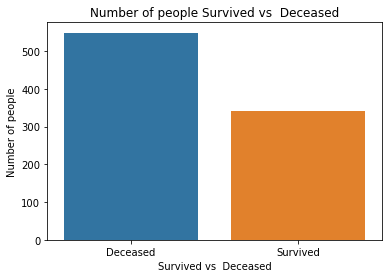

In [45]:
ax = sns.countplot(data=data,x = 'Survived');
plt.title("Number of people Survived vs  Deceased")
plt.xlabel("Survived vs  Deceased")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Deceased','Survived'])
plt.show()

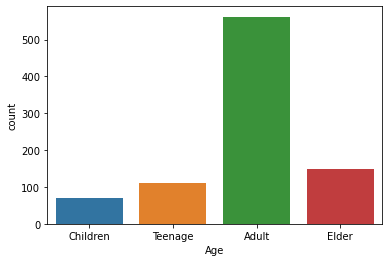

In [49]:
temp = data.copy()
temp['Age'] = pd.cut(temp['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
ax = sns.countplot(data=temp,x = 'Age')

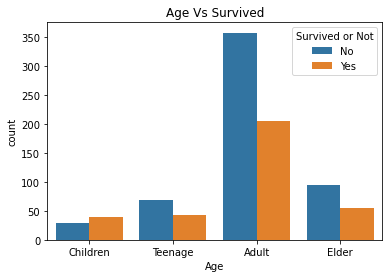

In [51]:
ax = sns.countplot(data=temp,x = 'Age',hue='Survived')
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Age Vs Survived')
plt.show()

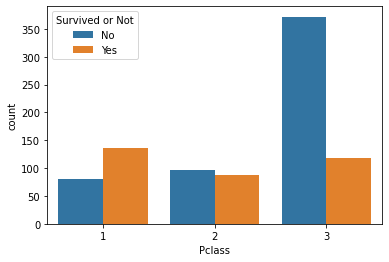

In [52]:
ax = sns.countplot(data=temp,x='Pclass',hue='Survived');
plt.legend(title='Survived or Not', loc='upper left', labels=['No', 'Yes'])

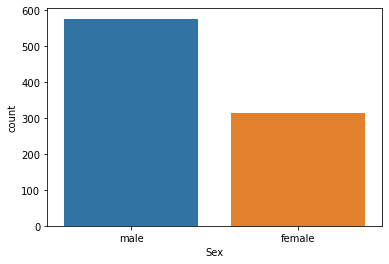

In [53]:
ax = sns.countplot(data=temp,x='Sex')

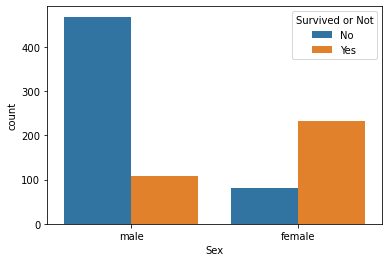

In [54]:
ax = sns.countplot(data=temp,x='Sex',hue='Survived');
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes'])

Text(0.5, 0, 'Port of Embarkation')

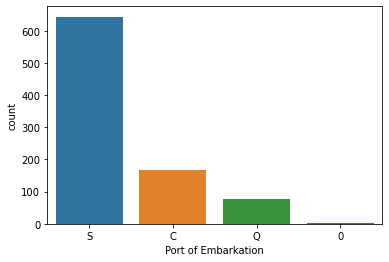

In [55]:
ax = sns.countplot(data=temp,x='Embarked')
ax.set_xlabel('Port of Embarkation')

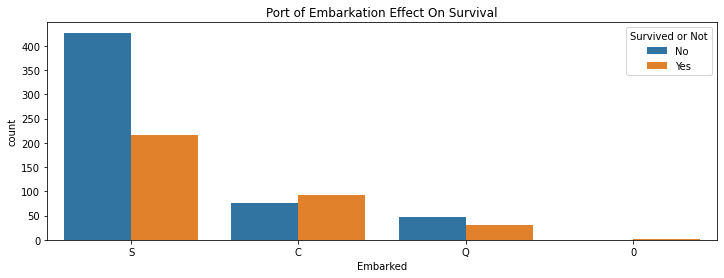

In [56]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data=temp,x='Embarked',hue='Survived')
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes'])
plt.title('Port of Embarkation Effect On Survival')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Sex'>

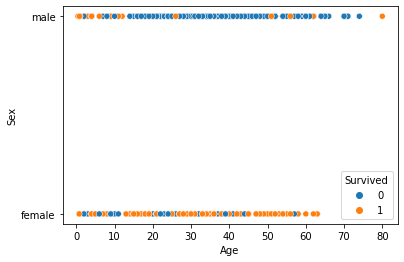

In [9]:
sns.scatterplot(x="Age", y="Sex", data=data, hue="Survived")

***Looks like more females survived then males***

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

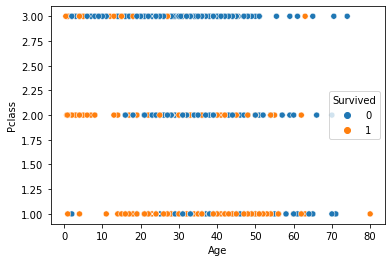

In [10]:
sns.scatterplot(x="Age", y="Pclass", data=data, hue="Survived")

***Passanger class 1 looks to have more survivors than 2 or 3. 3 Has the least amount of survivors***

<AxesSubplot:xlabel='Age', ylabel='Fare'>

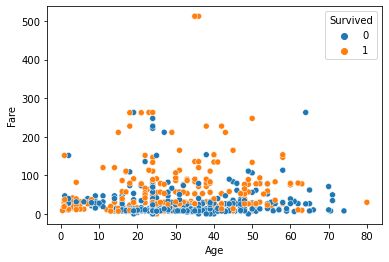

In [11]:
sns.scatterplot(x="Age", y="Fare", data=data, hue="Survived")

***Those who payed a higher fare looked to survive more***

<AxesSubplot:xlabel='Age', ylabel='SibSp'>

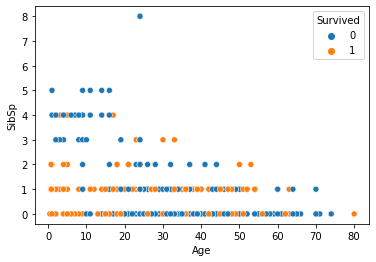

In [12]:
sns.scatterplot(x="Age", y="SibSp", data=data, hue="Survived")

***A high amount of sibsp on board lead to a more increased fatality***

<AxesSubplot:xlabel='Age', ylabel='Parch'>

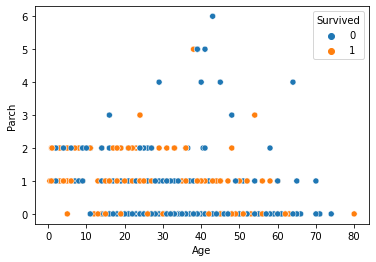

In [13]:
sns.scatterplot(x="Age", y="Parch", data=data, hue="Survived")

***Looks scattered, no correlation observed***

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X, y = data.iloc[:,[2,4,5,6]] , data.iloc[:,1] # only getting the attributes that seem relevant

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

***Encoding Data***

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)

OrdinalEncoder()

In [13]:
X_train = ordinal_encoder.transform(X_train)

In [20]:
X_train = pd.DataFrame(X_train)

In [21]:
X_train.head()

,0,1,2,3
0,0.0,1.0,57.0,0.0
1,1.0,1.0,28.0,0.0
2,2.0,1.0,39.0,0.0
3,2.0,1.0,32.0,1.0
4,2.0,0.0,10.0,4.0


In [23]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_test)

OrdinalEncoder()

In [24]:
X_test = ordinal_encoder.transform(X_test)

In [25]:
X_test = pd.DataFrame(X_test)

In [25]:
X_test.head()

,0,1,2,3
0,2.0,1.0,20.0,1.0
1,1.0,1.0,28.0,0.0
2,2.0,1.0,14.0,0.0
3,1.0,0.0,3.0,0.0
4,2.0,0.0,8.0,1.0


***Lets now scale our data***

In [26]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [27]:
scaler = Scaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)

In [28]:
scaler = Scaler()
scaler.fit(X_test)
X_test= scaler.transform(X_test)

In [29]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [30]:
X_train.columns = ['Pclass', 'Age', 'Sex', 'Sibsp']

In [31]:
y_train.columns = ['Survived']

In [32]:
X_train.head()

,Pclass,Age,Sex,Sibsp
0,0.0,1.0,0.695122,0.000000
1,0.5,1.0,0.341463,0.000000
2,1.0,1.0,0.475610,0.000000
3,1.0,1.0,0.390244,0.166667
4,1.0,0.0,0.121951,0.666667


***Lets try a few models and see the one with the best accuracy***

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import model_selection

In [34]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
#models.append(('DTR', DecisionTreeRegressor()))

In [35]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVC', SVC()),
 ('LSVC', LinearSVC()),
 ('RFC', RandomForestClassifier())]

In [36]:
seed = 7
results = []
names = []
X = X_train
Y = y_train


for name, model in models:
    kfold = model_selection.KFold( n_splits=10, shuffle=True,random_state=42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    ### see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for scoring parameter
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.794894 (0.045188)
KNN: 0.801917 (0.043380)
NB: 0.766882 (0.059506)
SVC: 0.803326 (0.049652)
LSVC: 0.794875 (0.046524)
RFC: 0.806103 (0.032835)


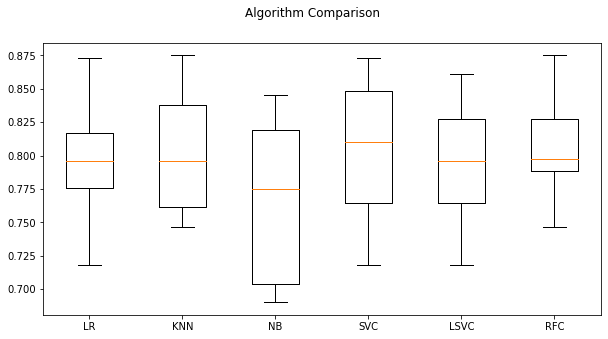

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

## We first create a dictionary of parameters and their values to explore 

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = GridSearchCV(
    model_svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 50.0], 'coef0': [0.0, 0.1, 0.5],
                         'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.8230046948356808

In [42]:
svc = grid_search.best_estimator_

In [43]:
svc

SVC(C=50.0, gamma=1, kernel='poly')

In [44]:
param_grid = {
    'n_neighbors': np.arange(1,21,2)
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    knn, param_grid, cv=10, scoring='accuracy')#C is how many folds we want
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

In [45]:
grid_search.best_score_

0.8089397496087637

In [46]:
param_grid = {
    
}

logreg = LogisticRegression()

grid_search = GridSearchCV(
    logreg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), param_grid={},
             scoring='accuracy')

In [47]:
grid_search.best_score_

0.7906690140845071

In [48]:
from sklearn import tree

In [49]:
clf = tree.DecisionTreeClassifier()

In [51]:
clf = clf.fit(X_train, y_train)

In [52]:
pred = clf.predict(X_test)

In [53]:
np.sum(pred==y_test)/len(y_test)

0.7821229050279329

In [55]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=222)

In [56]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=222)

In [57]:
pred = clf.predict(X_test)

In [58]:
np.sum(pred==y_test)/len(y_test)

0.7877094972067039

***SVC seems to be the best indicator***

In [57]:
test = pd.read_csv('test.csv')

In [59]:
86/len(test)

0.20574162679425836

In [115]:
model_svc = SVC(C=50.0, gamma=1, kernel='poly')

In [116]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
test_data = test.iloc[:,[1,3,4,5]]

In [118]:
np.sum(test_data.isna())

Pclass     0
Sex        0
Age       86
SibSp      0
dtype: int64

In [119]:
test_data=test_data.fillna(0)

In [120]:
test_data_median = test_data['Age'].median()
test_data['Age'] = test_data['Age'].replace(to_replace=0,value=test_data_median)

In [121]:
np.sum(test_data.isna())

Pclass    0
Sex       0
Age       0
SibSp     0
dtype: int64

In [122]:
test_data = pd.DataFrame(test_data)

In [123]:
test_data['Age'].median()

24.0

In [124]:
test_data.head()

,Pclass,Sex,Age,SibSp
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,1


In [125]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(test_data)

OrdinalEncoder()

In [126]:
test_data = ordinal_encoder.transform(test_data)

In [127]:
test_data = pd.DataFrame(test_data)

In [128]:
test_data.head()

,0,1,2,3
0,2.0,1.0,44.0,0.0
1,2.0,0.0,60.0,1.0
2,1.0,1.0,74.0,0.0
3,2.0,1.0,34.0,0.0
4,2.0,0.0,27.0,1.0


In [77]:
scaler = Scaler()
scaler.fit(test_data)
test_data= scaler.transform(test_data)

In [78]:
test_data = pd.DataFrame(test_data)

In [79]:
test_data.head()

,0,1,2,3
0,1.0,1.0,0.564103,0.000000
1,1.0,0.0,0.769231,0.166667
2,0.5,1.0,0.948718,0.000000
3,1.0,1.0,0.435897,0.000000
4,1.0,0.0,0.346154,0.166667


In [129]:
model_svc

SVC(C=50.0, gamma=1, kernel='poly')

In [130]:
model_svc.fit(X_train, y_train)

SVC(C=50.0, gamma=1, kernel='poly')

In [131]:
pred = model_svc.predict(test_data)

In [132]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [133]:
col = np.array(test.iloc[:,0])

In [134]:
col

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [135]:
pred = np.array(pred)

In [136]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [137]:
df = pd.DataFrame({'PassengerId':col, 'Survived':pred})

In [138]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [139]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [140]:
df.to_csv('Titanic_predictions.csv', index=False)